# V827 spot-checking for other orders

In [1]:
#! cat /Users/obsidian/Desktop/defaults.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('../sf/V827Tau/m102/output/mix_emcee/run01/spec_config.csv')
#df = pd.read_csv('../sf/V827Tau/m102/output/mix_emcee/run01/models_ff-05_50_95.csv')

In [5]:
df.head(2)

,data,wl,model_composite,model_cool50,model_hot50
0,1.026579,17459.808040,1.047781,0.447176,0.600605
1,1.035876,17459.935327,1.053016,0.451260,0.601756


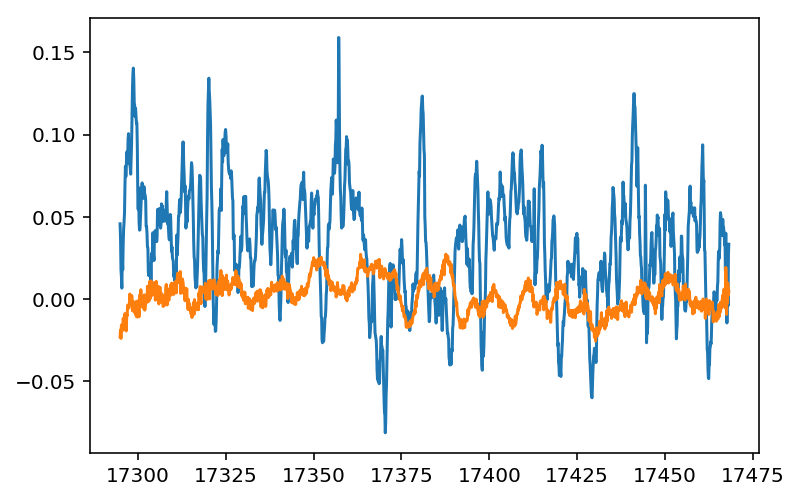

In [7]:
CC = np.load('../sf/V827Tau/m103/output/mix_emcee/run01/CC.npy')

noised = np.random.multivariate_normal(df.model_composite, CC)

R_GP = df.model_composite-noised
R_dat = df.model_composite-df.data

plt.plot(df.wl, R_dat)
plt.plot(df.wl, R_GP)

In [8]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

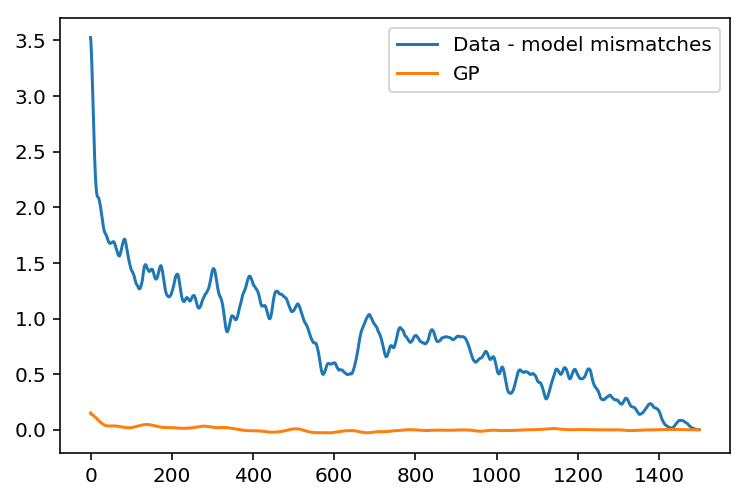

In [9]:
plt.plot(autocorr(R_dat.values), label='Data - model mismatches')
plt.plot(autocorr(R_GP.values), label = 'GP')
plt.legend(loc='best')

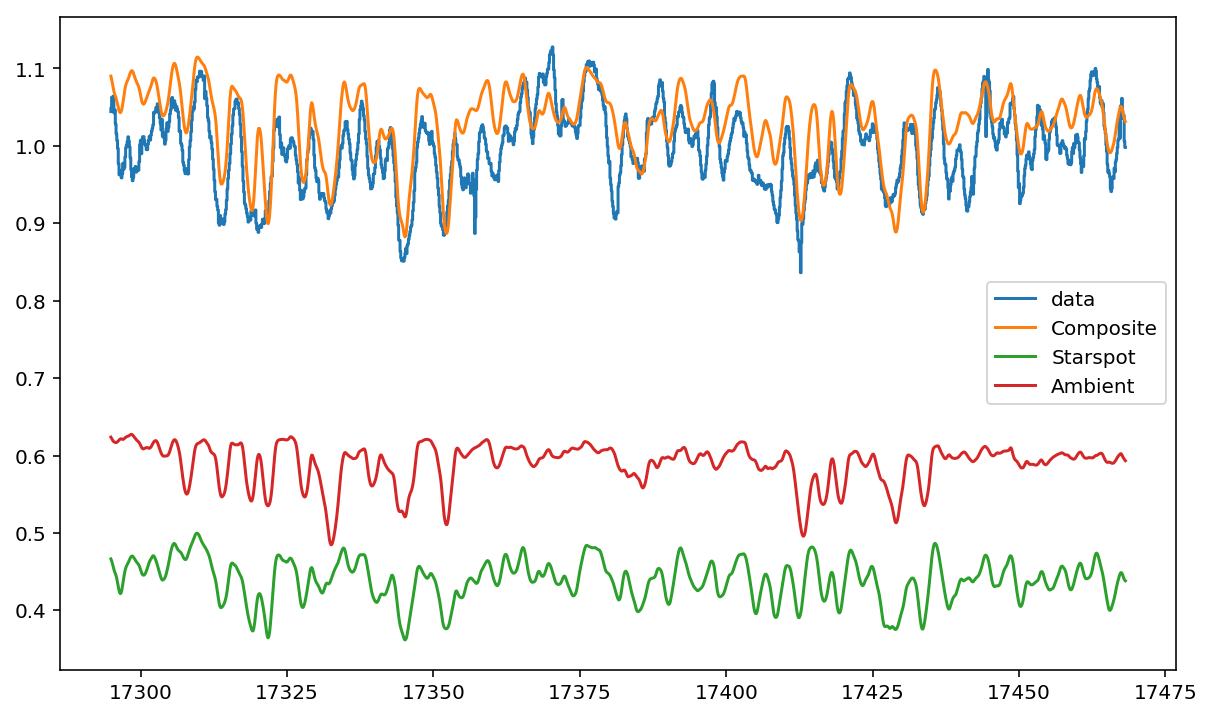

In [11]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data')
scale = 1.0 #df.data.median()/df.model_composite.median()
plt.plot(df.wl, df.model_composite*scale, label='Composite')
#plt.plot(df.wl, noised, label='Noised up')
plt.plot(df.wl, df.model_cool50, label='Starspot')
plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.legend(loc='best')

Need to adjust `logOmega`:

In [12]:
logOmega = -5.42
logOmega2 = -5.20
f = 10**logOmega2 / (10**logOmega2 + 10**logOmega)
f

0.624001758617667

What about the MCMC chains?

In [4]:
ws = np.load("../sf/V827Tau/m103/output/mix_emcee/run01/emcee_chain.npy")

In [5]:
max_obs = ws.any(axis=(0,2)).sum()

In [6]:
max_obs

5000

In [7]:
burned = ws[:, 0:max_obs,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [8]:
from matplotlib.ticker import MaxNLocator

In [9]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", '[Fe/H]',r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{eff}, 2}$", r"$\log{\Omega_2}$",
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

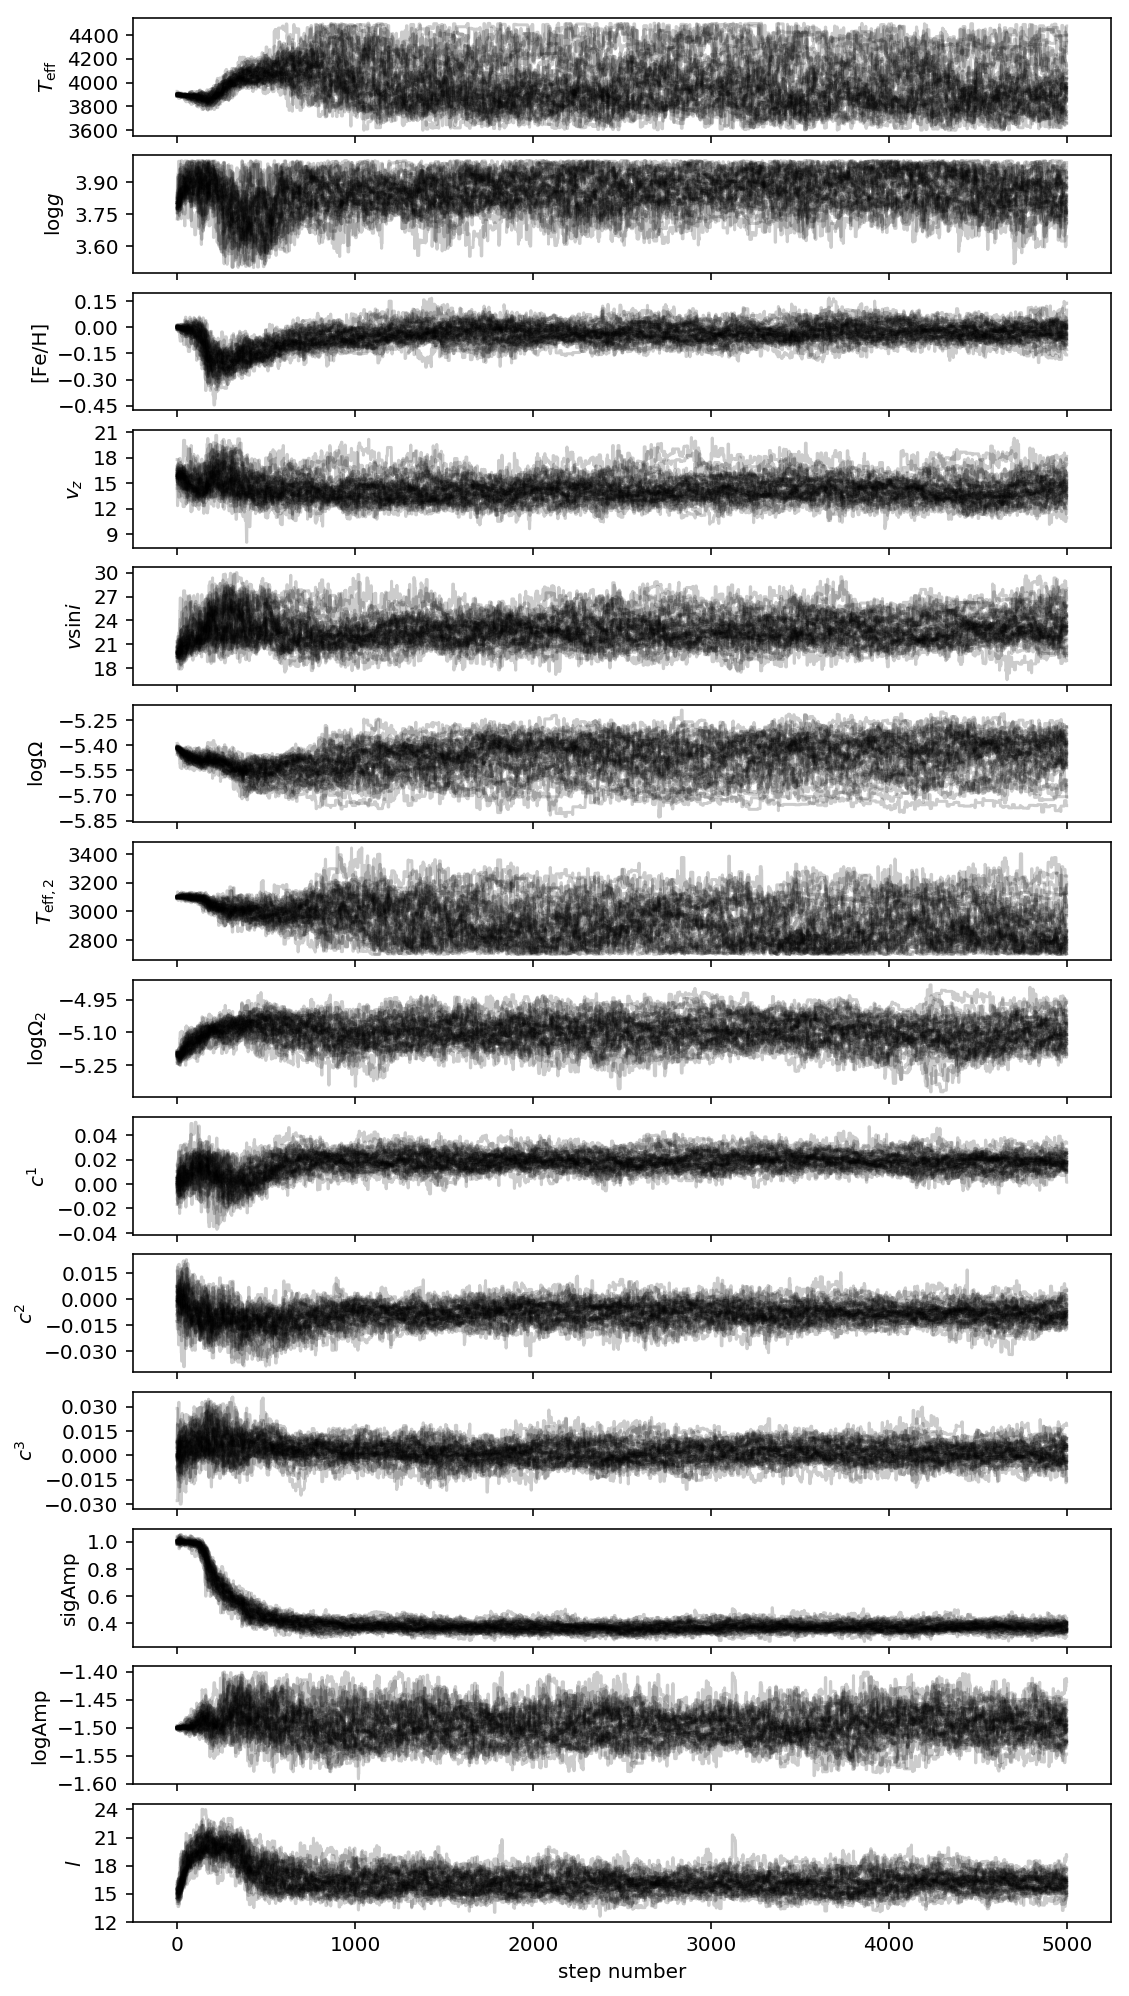

In [10]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

What do those final 200 samples look like in spectra?

In [11]:
df = pd.read_csv('../sf/V827Tau/m103/output/mix_emcee/run01/models_ff-05_50_95.csv')

In [12]:
df.head()

,data,wl,model_comp05,model_cool05,model_hot05,model_comp50,model_cool50,model_hot50,model_comp95,model_cool95,model_hot95
0,1.044286,17294.908902,0.991600,0.305353,0.686247,0.993197,0.411959,0.581237,1.023080,0.636423,0.386657
1,1.049140,17295.035019,0.988389,0.302850,0.685538,0.990902,0.409781,0.581122,1.017505,0.632295,0.385211
2,1.062800,17295.161119,0.985636,0.300457,0.685179,0.988401,0.407268,0.581133,1.011376,0.627418,0.383957
3,1.062108,17295.287202,0.983170,0.298105,0.685065,0.985864,0.404633,0.581231,1.005518,0.622385,0.383133
4,1.064298,17295.413268,0.980698,0.295634,0.685064,0.983237,0.401851,0.581386,1.000591,0.617899,0.382692


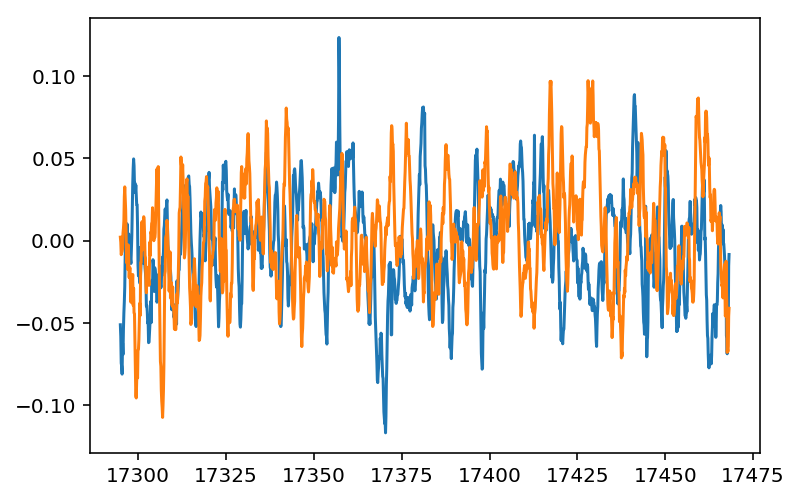

In [13]:
CC = np.load('../sf/V827Tau/m103/output/mix_emcee/run01/CC.npy')

noised = np.random.multivariate_normal(df.model_comp50, CC)

R_GP = df.model_comp50-noised
R_dat = df.model_comp50-df.data

plt.plot(df.wl, R_dat)
plt.plot(df.wl, R_GP)

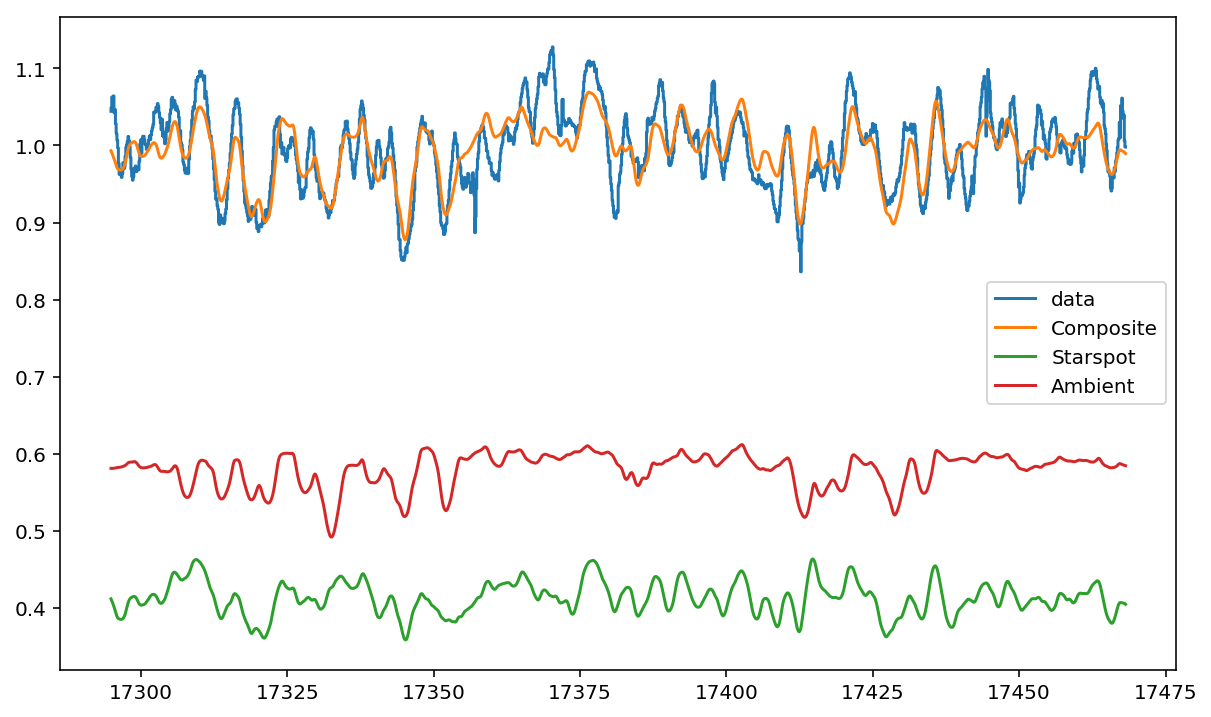

In [14]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data')
plt.plot(df.wl, df.model_comp50, label='Composite')
#plt.plot(df.wl, df.model_comp05, label='Composite $-2\sigma$')
#plt.plot(df.wl, df.model_comp95, label='Composite $+2\sigma$')
#plt.plot(df.wl, noised, label='Noised up')
plt.plot(df.wl, df.model_cool50, label='Starspot')
plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data')
plt.plot(df.wl, df.model_comp50, label='Composite')
#plt.plot(df.wl, df.model_comp05, label='Composite $-2\sigma$')
#plt.plot(df.wl, df.model_comp95, label='Composite $+2\sigma$')
#plt.plot(df.wl, noised, label='Noised up')
plt.plot(df.wl, df.model_cool50, label='Starspot')
plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.legend(loc='best')

Not bad!